# Payment Industry Analysis

### By Dexter Nguyen
#### Updated: August 30, 2021

### Import libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# Tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# libraries for visualization
import matplotlib.pyplot as plt # Library for 2D plots of arrays
from mpl_toolkits.mplot3d import Axes3D  # Library for 3D plotting
import matplotlib as mpl # Library for creating static, animated, and interactive visualizations
import seaborn as sns # Library based on matplotlib
import plotly.express as px # Contains functions that can create entire figures at once

# Check
print('Libraries imported.')

Libraries imported.


### Read data sets and do some transformation

#### Funnel data

In [242]:
# Read the funnel data
filename1 = 'C:/Users/Thanh Tinh Nguyen/Google Drive/Data Science/funnel.csv'
funneldata = pd.read_csv(filename1)
funneldata.head()

,merchant_id,user_id,checkout_id,action,action_date
0,D59QS30LK6F2IYOA,2291-6569-ZLWO,MP7KTW20X4LVWDQB,Checkout Loaded,3/31/16 0:00
1,3XGCFF8YUFM65WSM,4927-7293-MJWN,UTYSI56OMVL9JW0C,Checkout Loaded,1/29/16 0:00
2,H7GADDVO9CIZHMCL,0,2QV1BSCTSMBL6M0M,Checkout Loaded,3/5/16 0:00
3,MNLK8D11U6PV4THN,0,ZM2PFHD1UUQBZHAC,Checkout Loaded,3/27/16 0:00
4,H7GADDVO9CIZHMCL,0,CLPU7LY5JMOZQ7LU,Checkout Loaded,3/9/16 0:00


#### Loans data

In [243]:
# Read the loans data
filename2 = 'C:/Users/Thanh Tinh Nguyen/Google Drive/Data Science/loans.csv'
loansdata = pd.read_csv(filename2)
loansdata.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019


In [244]:
# For further analysis, we may want to use user age information.
# Creat a new column to calculate age of users and a another column classify these ages into 4 different groups:
# 1. Younger than 30
# 2. Age 30-44
# 3. Age 45-64
# 4. 65 and older

In [245]:
# Create a new column age by using current year - user_dob_year
loansdata['age'] = (2021 - loansdata['user_dob_year'])
loansdata.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70


In [246]:
# Create a list of our conditions
conditions = [
    (loansdata['age'] < 30),
    (loansdata['age'] >= 30) & (loansdata['age'] <= 44),
    (loansdata['age'] >= 45) & (loansdata['age'] <= 64),
    (loansdata['age'] >= 65)
    ]

# create a list of the values we want to assign for each condition
values = ['Younger than 30', 'Age 30-44', 'Age 45-64', '65 and older']

# create a new column age_group and use np.select to assign values to it using our lists as arguments
loansdata['age_group'] = np.select(conditions, values)

# display updated DataFrame
loansdata.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49,Age 45-64
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40,Age 30-44
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38,Age 30-44
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40,Age 30-44
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70,65 and older


In [248]:
# Group fico score into different group:
# <580: Poor
# 580-669: Fair
# 670-739: Good
# 740-799: Very Good
# 800: Exceptional

In [249]:
# Create a list of our conditions
conditions2 = [
    (loansdata['fico_score'] < 580),
    (loansdata['fico_score'] >= 580) & (loansdata['fico_score'] <= 669),
    (loansdata['fico_score'] >= 670) & (loansdata['fico_score'] <= 739),
    (loansdata['fico_score'] >= 740) & (loansdata['fico_score'] <= 799),
    (loansdata['fico_score'] >= 800)]

# create a list of the values we want to assign for each condition
values2 = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']

# create a new column age_group and use np.select to assign values to it using our lists as arguments
loansdata['fico_group'] = np.select(conditions2, values2)

# display updated DataFrame
loansdata.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49,Age 45-64,Good
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40,Age 30-44,Fair
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38,Age 30-44,Exceptional
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40,Age 30-44,Fair
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70,65 and older,Very Good


#### Merchants data

In [250]:
# Read the merchants data
filename3 = 'C:/Users/Thanh Tinh Nguyen/Google Drive/Data Science/merchants.csv'
merchantsdata = pd.read_csv(filename3)
merchantsdata.head()

,merchant_id,merchant_name,category
0,D59QS30LK6F2IYOA,Mozzarella Factory,Furniture
1,2ZOAIY64Q3G5QU6Q,American Inc.,Jewelry
2,XG9744A6PCIJXTVB,Monterey Jack Sparrow,Furniture
3,P2T82BO89LRD4WYH,Brie Corp.,Music
4,I19WHSQA1OEG7OLK,Halloumi Boards,Jewelry


### Q1: Please review the integrity of the data. Do you notice any data anomalies?

There are few ways to detect data anomalies or outliers, like starting first with missing values, using frequency counts, or histogram/boxplots visualization

#### 1.1. Review funnel data

In [251]:
# View the information
funneldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433326 entries, 0 to 433325
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   merchant_id  433326 non-null  object
 1   user_id      433326 non-null  object
 2   checkout_id  433326 non-null  object
 3   action       433326 non-null  object
 4   action_date  433326 non-null  object
dtypes: object(5)
memory usage: 16.5+ MB


In [252]:
# Check missing data
funnelmissing = pd.DataFrame({'Total  missing values': funneldata.isnull().sum(),
                   '% missing values': round((funneldata.isnull().sum() * 100/ len(funneldata)),2).sort_values(ascending=False)})
funnelmissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
action,0,0.0
action_date,0,0.0
checkout_id,0,0.0
merchant_id,0,0.0
user_id,0,0.0


In [253]:
# Frequency Counts of all columns in funnel data
for col in funneldata.columns: 
    try:      
        print('Frequency Count of ', col)
        print(funneldata[col].value_counts())
        print('')
    except ValueError:
        print('This column can not be represented as a histogram')

Frequency Count of  merchant_id
YKHCNPR33GOHG3M6    192871
H7GADDVO9CIZHMCL     70152
MNLK8D11U6PV4THN     58218
ZXTF6RNQXU3VCMHV     29234
P2T82BO89LRD4WYH     26936
8L2VTJ7XV2QQ4PCU     19830
3XGCFF8YUFM65WSM      9253
BO6016RXD917I3KD      8786
D59QS30LK6F2IYOA      7488
I19WHSQA1OEG7OLK      5469
XG9744A6PCIJXTVB      3459
96V3EU1EPFDPSA01       879
LWGKASO1U9UXFLAJ       515
2ZOAIY64Q3G5QU6Q       215
44WXOQ22LJEYREMX        12
JZDLVWA3ULSSD6DC         6
5JDXXV6949VE1GLT         3
Name: merchant_id, dtype: int64

Frequency Count of  user_id
0                 67202
4080-7608-SFDJ      305
0888-1688-PGKN      275
3779-9245-UEGU      253
1453-7726-WNOY      223
                  ...  
8091-3662-OUQR        1
4037-2598-FAVL        1
3738-7451-UNMZ        1
8872-4177-AIYZ        1
4811-9851-DZDY        1
Name: user_id, Length: 82800, dtype: int64

Frequency Count of  checkout_id
NIAE0IH1HNBUA50G    4
XCAQBDO4TO3YAO45    4
2ZTIMOVERTV1BKEA    4
AG2ZOLST1OBY77B3    4
46G78SKCNF14PNH1    

In [ ]:
# So we can see that there are 67202 user id with value of 0, which may be missing values. 

#### 1.2. Review loans data

In [255]:
# View the information
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43687 entries, 0 to 43686
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             43687 non-null  object 
 1   user_id                 43687 non-null  object 
 2   checkout_id             43687 non-null  object 
 3   checkout_date           43687 non-null  object 
 4   loan_amount             43687 non-null  float64
 5   down_payment_amount     43687 non-null  float64
 6   users_first_capture     43687 non-null  object 
 7   user_dob_year           43687 non-null  int64  
 8   loan_length_months      43687 non-null  int64  
 9   mdr                     43687 non-null  float64
 10  apr                     43687 non-null  float64
 11  fico_score              43687 non-null  int64  
 12  loan_return_percentage  43687 non-null  float64
 13  age                     43687 non-null  int64  
 14  age_group               43687 non-null

In [256]:
# Check missing data
loansmissing = pd.DataFrame({'Total  missing values': loansdata.isnull().sum(),
                   '% missing values': round((loansdata.isnull().sum() * 100/ len(loansdata)),2).sort_values(ascending=False)})
loansmissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
age,0,0.0
age_group,0,0.0
apr,0,0.0
checkout_date,0,0.0
checkout_id,0,0.0
down_payment_amount,0,0.0
fico_group,0,0.0
fico_score,0,0.0
loan_amount,0,0.0
loan_length_months,0,0.0


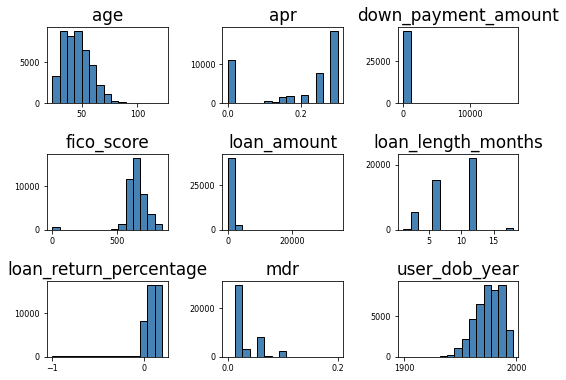

In [257]:
# Since loans data includes numerical data features, we may want to use histogram and boxplos to detect any outliers
# Visualize the histograms of each numeric variables
loansdata.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
          xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

In [258]:
# Looking at the histograms, we may see some potential outliers most of the features. Lets use summary stats for more info:
loansdata[['age', 'apr', 'down_payment_amount', 
           'fico_score', 'loan_amount','loan_length_months',
           'loan_return_percentage', 'mdr', 'user_dob_year']].describe()

,age,apr,down_payment_amount,fico_score,loan_amount,loan_length_months,loan_return_percentage,mdr,user_dob_year
count,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000,43687.000000
mean,45.837457,0.195146,25.073145,649.448326,760.813632,8.758029,0.060408,0.032777,1975.162543
std,11.614734,0.123484,184.794586,95.882933,924.629640,3.662579,0.177156,0.023479,11.614734
min,24.000000,0.000000,0.000000,0.000000,0.230000,1.000000,-0.999800,0.000000,1899.000000
25%,37.000000,0.000000,0.000000,614.000000,210.000000,6.000000,0.039800,0.019000,1968.000000
50%,45.000000,0.250000,0.000000,648.000000,513.000000,12.000000,0.093600,0.019000,1976.000000
75%,53.000000,0.300000,0.000000,691.000000,950.000000,12.000000,0.147200,0.059000,1984.000000
max,122.000000,0.300000,16520.000000,850.000000,34020.000000,18.000000,0.200000,0.200000,1997.000000


In [259]:
# From this stats table, we can see some potential anomalies:
# The highest age at 122
# The highest down payment: $16,520
# Some users with 0 fico score
# A big loan amount at $34,020

This column can not be represented as a boxplot
This column can not be represented as a boxplot
This column can not be represented as a boxplot
This column can not be represented as a boxplot
This column can not be represented as a boxplot
This column can not be represented as a boxplot
This column can not be represented as a boxplot


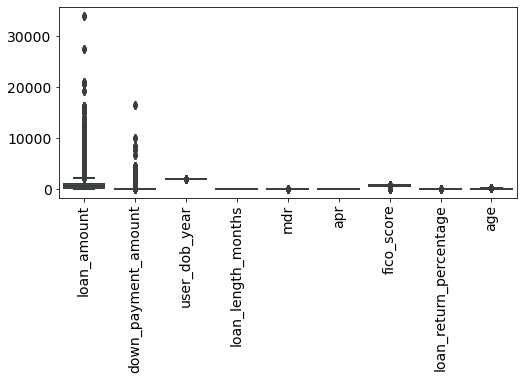

In [260]:
# For better visual detection in terms of the number of outliers for each variable,
# we can use boxplots to dive deep into these variables
# Visualize the boxplots of numerical variables
for col in loansdata.columns: 
    try:      
        loansdata[col] = pd.to_numeric(loansdata[col]) 
        sns.boxplot(data=loansdata)
        plt.xticks(rotation=90)
    except ValueError:
        print('This column can not be represented as a boxplot')

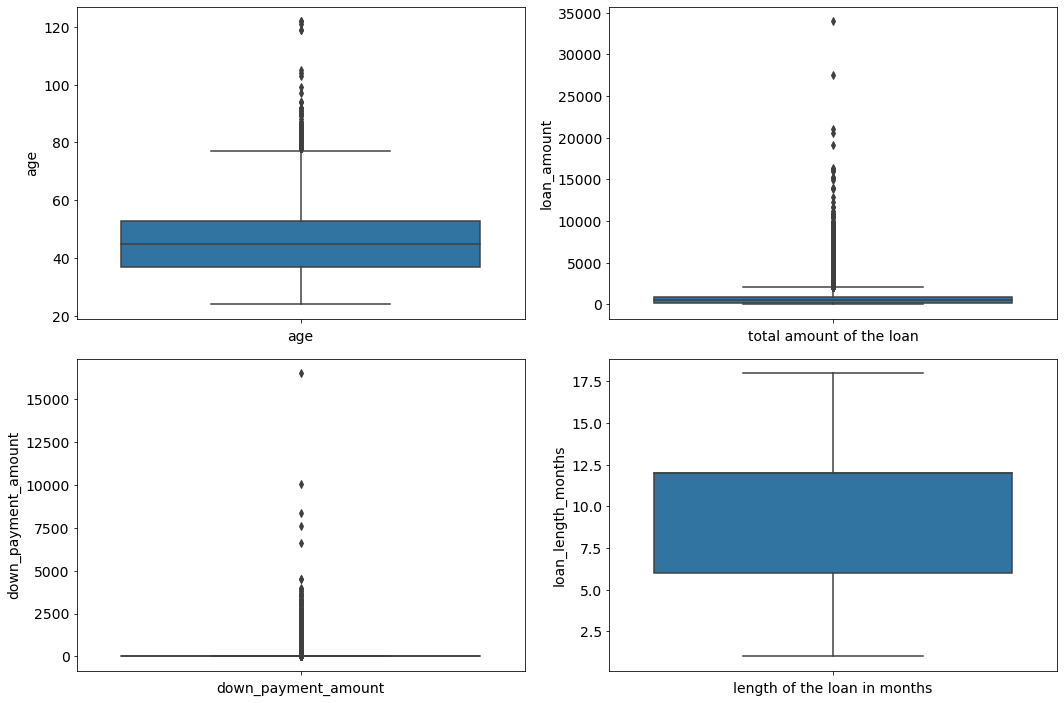

In [261]:
# For a better visualization, show the boxplots of each numerical variables
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2)

v01 = fig.add_subplot(gs[0, 0])
v01 = sns.boxplot(data=loansdata, y="age")
plt.xlabel('age')

v02 = fig.add_subplot(gs[0, 1])
v02 = sns.boxplot(data=loansdata, y="loan_amount")
plt.xlabel('total amount of the loan')

v03 = fig.add_subplot(gs[1, 0])
v03 = sns.boxplot(data=loansdata, y="down_payment_amount")
plt.xlabel('down_payment_amount')

v04 = fig.add_subplot(gs[1, 1])
v04 = sns.boxplot(data=loansdata, y="loan_length_months")
plt.xlabel('length of the loan in months')

plt.show()

In [ ]:
# Combining with the previous comments, there are a few of outliers:
# age: few people above 100
# loan_amount: few people has loans valued at $200,000 to $300,000
# down_payment_amount: any values above $5000 should be outliers

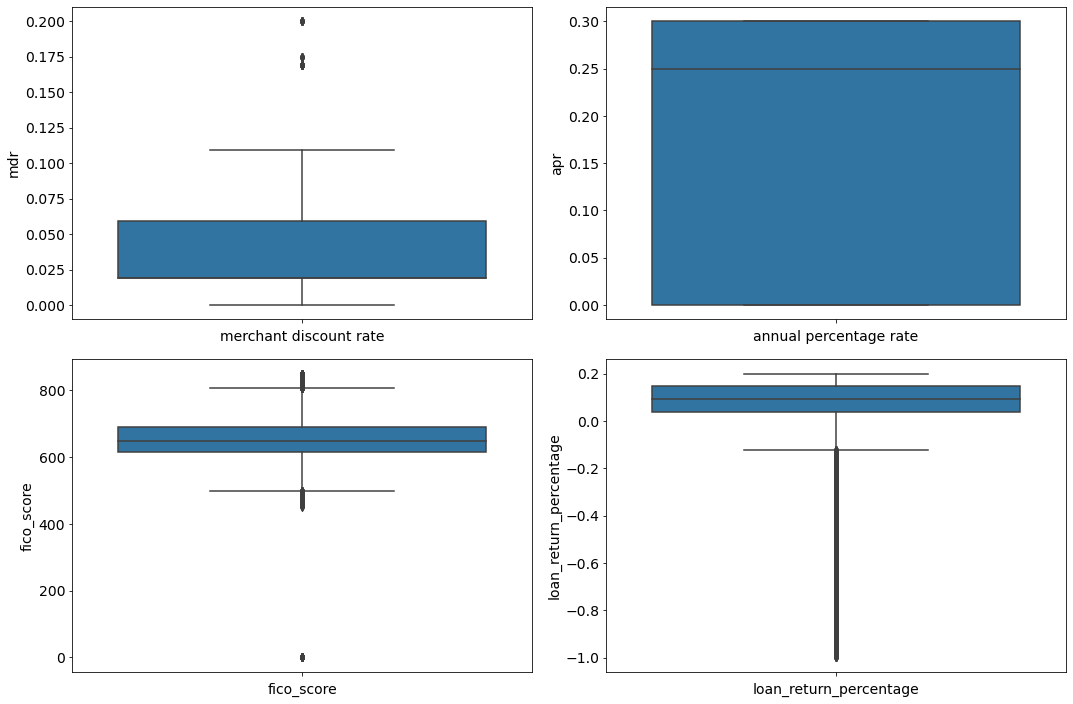

In [262]:
# Visualize the boxplots of the remaining numerical variables
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2)

v05 = fig.add_subplot(gs[0, 0])
v05 = sns.boxplot(data=loansdata, y="mdr")
plt.xlabel('merchant discount rate')

v06 = fig.add_subplot(gs[0, 1])
v06 = sns.boxplot(data=loansdata, y="apr")
plt.xlabel('annual percentage rate')

v07 = fig.add_subplot(gs[1, 0])
v07 = sns.boxplot(data=loansdata, y="fico_score")
plt.xlabel('fico_score')

v08 = fig.add_subplot(gs[1, 1])
v08 = sns.boxplot(data=loansdata, y="loan_return_percentage")
plt.xlabel('loan_return_percentage')

plt.show()

In [ ]:
# So there are a few of outliers:
# mdr: few merchant discount rates were recorded from 16% to 20% 
# fico_score: few users have 0 values
# loan_return_percentage: some cases the loans were not paid back in full

#### 1.3. Review merchants data

In [263]:
# View the information
merchantsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   merchant_id    18 non-null     object
 1   merchant_name  18 non-null     object
 2   category       18 non-null     object
dtypes: object(3)
memory usage: 560.0+ bytes


In [264]:
# Check missing data
merchantsmissing = pd.DataFrame({'Total  missing values': merchantsdata.isnull().sum(),
                   '% missing values': round((merchantsdata.isnull().sum() * 100/ len(merchantsdata)),2).sort_values(ascending=False)})
merchantsmissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
category,0,0.0
merchant_id,0,0.0
merchant_name,0,0.0


In [265]:
# Frequency Counts of all columns in merchants data
for col in merchantsdata.columns: 
    try:      
        print('Frequency Count of ', col)
        print(merchantsdata[col].value_counts())
        print('')
    except ValueError:
        print('This column can not be represented as a histogram')

Frequency Count of  merchant_id
E3EEKXY4HTODWZKI    1
YKHCNPR33GOHG3M6    1
5JDXXV6949VE1GLT    1
I19WHSQA1OEG7OLK    1
96V3EU1EPFDPSA01    1
MNLK8D11U6PV4THN    1
JZDLVWA3ULSSD6DC    1
44WXOQ22LJEYREMX    1
H7GADDVO9CIZHMCL    1
ZXTF6RNQXU3VCMHV    1
YRNF32JOTOE9P03G    1
2ZOAIY64Q3G5QU6Q    1
P2T82BO89LRD4WYH    1
BO6016RXD917I3KD    1
8L2VTJ7XV2QQ4PCU    1
3XGCFF8YUFM65WSM    1
XG9744A6PCIJXTVB    1
D59QS30LK6F2IYOA    1
Name: merchant_id, dtype: int64

Frequency Count of  merchant_name
Roquefort NYC            2
Monterey Jack Sparrow    1
Cottage Company          1
Feta R Us                1
String & Stuff           1
Brie Corp.               1
Mozzarella Factory       1
American Inc.            1
Pepperjack Co.           1
Bagels & Cream           1
Swiss & Co.              1
Goat, LLC                1
Cheddar Inc.             1
Colby & Co.              1
Halloumi Boards          1
Blue Steel               1
Parmesan, LLC            1
Name: merchant_name, dtype: int64

Frequency C

In [ ]:
# So there seems to be no anomalies in the merchants dataset

### Q2: Calculate conversion through the funnel by day 

For this question, we will use the funnel data

In [266]:
# Using funnel dataset for this question
funneldata.head()

,merchant_id,user_id,checkout_id,action,action_date
0,D59QS30LK6F2IYOA,2291-6569-ZLWO,MP7KTW20X4LVWDQB,Checkout Loaded,3/31/16 0:00
1,3XGCFF8YUFM65WSM,4927-7293-MJWN,UTYSI56OMVL9JW0C,Checkout Loaded,1/29/16 0:00
2,H7GADDVO9CIZHMCL,0,2QV1BSCTSMBL6M0M,Checkout Loaded,3/5/16 0:00
3,MNLK8D11U6PV4THN,0,ZM2PFHD1UUQBZHAC,Checkout Loaded,3/27/16 0:00
4,H7GADDVO9CIZHMCL,0,CLPU7LY5JMOZQ7LU,Checkout Loaded,3/9/16 0:00


In [267]:
# Group by action_date and action; count the checkout_id for each day and each type of action
funnelcount = funneldata.groupby(['action_date', 'action']).count().reset_index()
funnelcount.head()

,action_date,action,merchant_id,user_id,checkout_id
0,1/1/16 0:00,Checkout Completed,397,397,397
1,1/1/16 0:00,Checkout Loaded,1463,1463,1463
2,1/1/16 0:00,Loan Terms Approved,663,663,663
3,1/1/16 0:00,Loan Terms Run,1070,1070,1070
4,1/10/16 0:00,Checkout Completed,454,454,454


In [268]:
# Pivot factors of action into different columns
funnelcountpivot = pd.pivot_table(funnelcount, index='action_date', columns='action', values='checkout_id')
funnelcountpivot.head()

action,Checkout Completed,Checkout Loaded,Loan Terms Approved,Loan Terms Run
action_date,,,,
1/1/16 0:00,397,1463,663,1070
1/10/16 0:00,454,1774,753,1257
1/11/16 0:00,506,1809,800,1333
1/12/16 0:00,450,1924,745,1299
1/13/16 0:00,494,2085,821,1439


In [269]:
# Reorder the columns and change the column names to be the same as the provided data structure
funneldata2 = funnelcountpivot[['Checkout Loaded', 'Loan Terms Run', 'Loan Terms Approved', 'Checkout Completed']]
funneldata2.rename(columns={"Checkout Loaded": "num_loaded"}, inplace=True)
funneldata2.rename(columns={"Loan Terms Run": "num_applied"}, inplace=True)
funneldata2.rename(columns={"Loan Terms Approved": "num_approved"}, inplace=True)
funneldata2.rename(columns={"Checkout Completed": "num_confirmed"}, inplace=True)
funneldata2.head()

action,num_loaded,num_applied,num_approved,num_confirmed
action_date,,,,
1/1/16 0:00,1463,1070,663,397
1/10/16 0:00,1774,1257,753,454
1/11/16 0:00,1809,1333,800,506
1/12/16 0:00,1924,1299,745,450
1/13/16 0:00,2085,1439,821,494


In [270]:
# Add three calculation columns to the funneldata2: application_rate, approval rate, and confirmation_rate
# We end up with the data structure required
funneldata2['application_rate'] = round(funneldata2['num_applied'] / funneldata2['num_loaded'], 2)
funneldata2['approval_rate'] = round(funneldata2['num_approved'] / funneldata2['num_applied'], 2)
funneldata2['confirmation_rate'] = round(funneldata2['num_confirmed'] / funneldata2['num_approved'], 2)
funneldata2.head()

action,num_loaded,num_applied,num_approved,num_confirmed,application_rate,approval_rate,confirmation_rate
action_date,,,,,,,
1/1/16 0:00,1463,1070,663,397,0.73,0.62,0.60
1/10/16 0:00,1774,1257,753,454,0.71,0.60,0.60
1/11/16 0:00,1809,1333,800,506,0.74,0.60,0.63
1/12/16 0:00,1924,1299,745,450,0.68,0.57,0.60
1/13/16 0:00,2085,1439,821,494,0.69,0.57,0.60


### Q3: Which merchant industry and/or user demographic would you focus business development on based on current checkout funnel and loan performance?

To answer this question, lets split the analysis into two parts: merchant industry and user demographic.

#### 3.1. Which merchant industry to focus on?

We are going to use two metrics to evaluate the merchant industries: revenue performance and checkout funnel

First, we want to find the revenue performance index, using the combination of two datasets: loans data and merchants data

In [271]:
# Use the loans dataset for this question
loansdata.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49,Age 45-64,Good
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40,Age 30-44,Fair
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38,Age 30-44,Exceptional
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40,Age 30-44,Fair
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70,65 and older,Very Good


In [272]:
# Use the merchants dataset for this question
merchantsdata.head()

,merchant_id,merchant_name,category
0,D59QS30LK6F2IYOA,Mozzarella Factory,Furniture
1,2ZOAIY64Q3G5QU6Q,American Inc.,Jewelry
2,XG9744A6PCIJXTVB,Monterey Jack Sparrow,Furniture
3,P2T82BO89LRD4WYH,Brie Corp.,Music
4,I19WHSQA1OEG7OLK,Halloumi Boards,Jewelry


In [273]:
# The first step is to merge loansdata and merchansdata
loansmerchants = pd.merge(loansdata, merchantsdata,
                 on='merchant_id', 
                 how='left')
loansmerchants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43687 entries, 0 to 43686
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   merchant_id             43687 non-null  object 
 1   user_id                 43687 non-null  object 
 2   checkout_id             43687 non-null  object 
 3   checkout_date           43687 non-null  object 
 4   loan_amount             43687 non-null  float64
 5   down_payment_amount     43687 non-null  float64
 6   users_first_capture     43687 non-null  object 
 7   user_dob_year           43687 non-null  int64  
 8   loan_length_months      43687 non-null  int64  
 9   mdr                     43687 non-null  float64
 10  apr                     43687 non-null  float64
 11  fico_score              43687 non-null  int64  
 12  loan_return_percentage  43687 non-null  float64
 13  age                     43687 non-null  int64  
 14  age_group               43687 non-null

In [274]:
# Check missing data
loansmerchantsmissing = pd.DataFrame({'Total  missing values': loansmerchants.isnull().sum(),
                   '% missing values': round((loansmerchants.isnull().sum() * 100/ len(loansmerchants)),2).sort_values(ascending=False)})
loansmerchantsmissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
category,35,0.08
merchant_name,35,0.08
age,0,0.00
loan_length_months,0,0.00
user_id,0,0.00
user_dob_year,0,0.00
merchant_id,0,0.00
mdr,0,0.00
loan_return_percentage,0,0.00
loan_amount,0,0.00


In [42]:
# We saw that there 35 missing values of category and merchant_name but these only account for 8%. We can keep moving.

In [275]:
# Add a new column that calculates the revenue for the company from each checkout_id
# Use formula: (mdr + loan_return_percentage) * loan_amount)
# We have two revenue sources: returns from consumers and transaction charges from merchants 

loansmerchants['revenue'] = round((loansmerchants['mdr'] + loansmerchants['loan_return_percentage']) * loansmerchants['loan_amount'])
loansmerchants.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group,merchant_name,category,revenue
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49,Age 45-64,Good,"Goat, LLC",Apparel,32.0
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40,Age 30-44,Fair,Cheddar Inc.,Apparel,125.0
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38,Age 30-44,Exceptional,Pepperjack Co.,Furniture,100.0
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40,Age 30-44,Fair,Pepperjack Co.,Furniture,128.0
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70,65 and older,Very Good,Pepperjack Co.,Furniture,138.0


In [276]:
# Group by merchant category to see the total revenue performance by category
loansmerchants2 = loansmerchants.groupby(['category']).sum()
loansmerchants2.head()

,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,revenue
category,,,,,,,,,,
Apparel,14199797.50,694951.99,52280465,236428,521.289,6903.0078,16931755,1599.3868,1231573,1151982.0
Furniture,14132975.14,208903.92,22697587,84348,777.177,149.1269,7754278,690.1006,513598,1930901.0
Jewelry,1801431.66,88151.09,1141935,5991,16.039,127.5053,399605,32.0953,26203,155057.0
Music,3063374.44,101567.90,10099691,55515,116.216,1337.4025,3262617,314.7108,229640,262913.0


In [277]:
# Drop irrelevant columns that might be incorrectly calculate using sum, keep revenue column
# We have the total revenue by merchant category
columns = ['revenue']
loansmerchantsrevenue = loansmerchants2[columns]
loansmerchantsrevenue.head()

,revenue
category,
Apparel,1151982.0
Furniture,1930901.0
Jewelry,155057.0
Music,262913.0


In [278]:
# So we can see that the total revenue from merchants in order of decreasing:
# 1. Furniture
# 2. Apparel
# 3. Music
# 4. Jewelry

In [279]:
# However, we may want to look at the total number of customer/user in each merchant category
# Group by merchant category to see the total revenue performance by category
loansmerchantscount = loansmerchants.groupby(['category']).nunique()
loansmerchantscount.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group,merchant_name,category,revenue
category,,,,,,,,,,,,,,,,,,,
Apparel,4,16121,26478,91,9494,2405,585,67,4,3,28,387,3752,67,4,5,4,1,1291
Furniture,5,11126,11485,91,1754,354,340,72,3,12,12,340,2764,72,4,5,5,1,1348
Jewelry,3,536,578,90,228,71,57,52,3,6,16,186,509,52,4,5,3,1,430
Music,3,3831,5111,91,2153,560,319,65,4,3,25,331,2158,65,4,5,3,1,635


In [280]:
# Drop irrelevant columns
# We have the total number of user by merchant category
columns = ['user_id']
loansmerchantscount_user = loansmerchantscount[columns]
loansmerchantscount_user.rename(columns={"user_id": "number_of_customers"}, inplace=True)
loansmerchantscount_user.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,number_of_customers
category,
Apparel,16121
Furniture,11126
Jewelry,536
Music,3831


In [ ]:
# So even though Furniture category contributes the highest total revenue but most of the users are from Apparel category

In [281]:
# Dive deep into the analysis by computing the revenue per user/customer for each of four category
# Merge two data
loansmerchants_revenuesummary = pd.merge(loansmerchantsrevenue, loansmerchantscount_user,
                 on='category', 
                 how='left')
# Create revenue per user column
loansmerchants_revenuesummary['revenue_per_customer'] = (round(loansmerchants_revenuesummary['revenue'] / 
                                                    loansmerchants_revenuesummary['number_of_customers']))
loansmerchants_revenuesummary.head()

,revenue,number_of_customers,revenue_per_customer
category,,,
Apparel,1151982.0,16121,71.0
Furniture,1930901.0,11126,174.0
Jewelry,155057.0,536,289.0
Music,262913.0,3831,69.0


In [ ]:
# So we can see that based on revenue per customer, Furniture category is even more potential.
# Also we should not let the high number of Jewelry distract our analysis because of its small market size

In [282]:
# Reset index
loansmerchants_revenuesummary = loansmerchants_revenuesummary.reset_index()

([<matplotlib.axis.YTick at 0x1c027532d30>,
 [Text(0, 0, '0.0'),
  Text(0, 0, '50.0'),
  Text(0, 0, '100.0'),
  Text(0, 0, '150.0'),
  Text(0, 0, '200.0'),
  Text(0, 0, '250.0'),
  Text(0, 0, '300.0'),
  Text(0, 0, '350.0')])

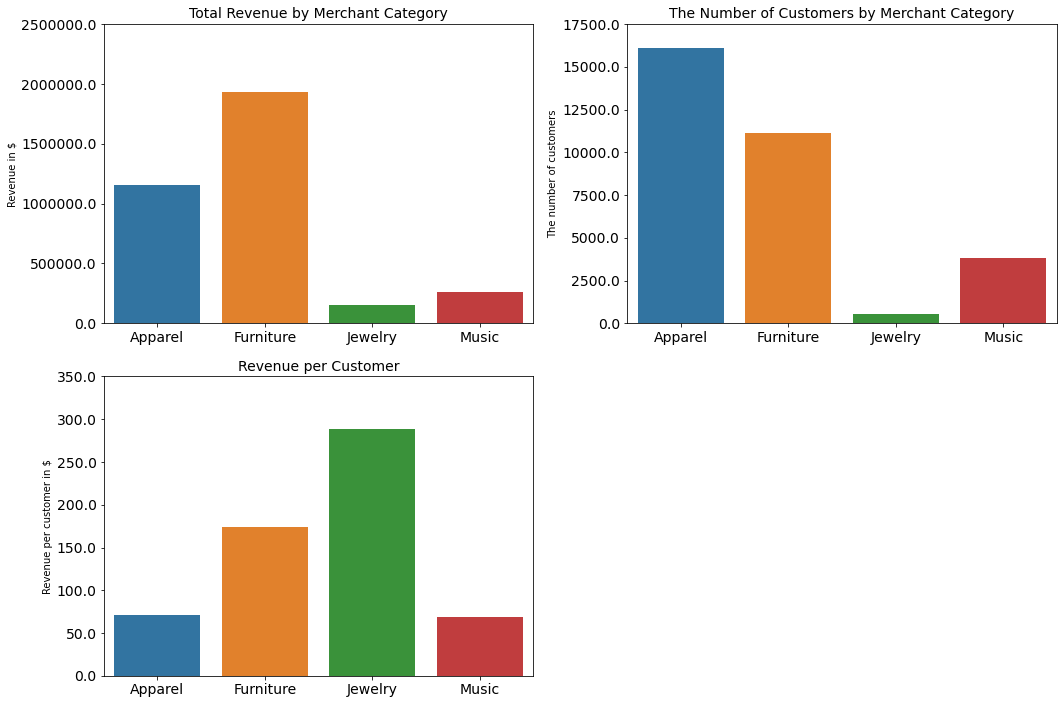

In [283]:
# Now lets build a visualization to summarize our analysis
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2)

v1 = fig.add_subplot(gs[0, 0])
v1 = sns.barplot(data = loansmerchants_revenuesummary, x='category', y='revenue')
v1.set_title("Total Revenue by Merchant Category", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('Revenue in $', fontsize=10)
plt.yticks(v1.get_yticks(), v1.get_yticks())

v2 = fig.add_subplot(gs[0, 1])
v2 = sns.barplot(data = loansmerchants_revenuesummary, x='category', y='number_of_customers')
v2.set_title("The Number of Customers by Merchant Category", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('The number of customers', fontsize=10)
plt.yticks(v2.get_yticks(), v2.get_yticks())

v3 = fig.add_subplot(gs[1, 0])
v3 = sns.barplot(data = loansmerchants_revenuesummary, x='category', y='revenue_per_customer')
v3.set_title("Revenue per Customer", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('Revenue per customer in $', fontsize=10)
plt.yticks(v3.get_yticks(), v3.get_yticks())

Second, we want to find the current checkout funnel, using a combination of funnel data and merchants data

In [284]:
# Use the funnel data
funneldata.head()

,merchant_id,user_id,checkout_id,action,action_date
0,D59QS30LK6F2IYOA,2291-6569-ZLWO,MP7KTW20X4LVWDQB,Checkout Loaded,3/31/16 0:00
1,3XGCFF8YUFM65WSM,4927-7293-MJWN,UTYSI56OMVL9JW0C,Checkout Loaded,1/29/16 0:00
2,H7GADDVO9CIZHMCL,0,2QV1BSCTSMBL6M0M,Checkout Loaded,3/5/16 0:00
3,MNLK8D11U6PV4THN,0,ZM2PFHD1UUQBZHAC,Checkout Loaded,3/27/16 0:00
4,H7GADDVO9CIZHMCL,0,CLPU7LY5JMOZQ7LU,Checkout Loaded,3/9/16 0:00


In [285]:
# Use the merchant data
merchantsdata.head()

,merchant_id,merchant_name,category
0,D59QS30LK6F2IYOA,Mozzarella Factory,Furniture
1,2ZOAIY64Q3G5QU6Q,American Inc.,Jewelry
2,XG9744A6PCIJXTVB,Monterey Jack Sparrow,Furniture
3,P2T82BO89LRD4WYH,Brie Corp.,Music
4,I19WHSQA1OEG7OLK,Halloumi Boards,Jewelry


In [286]:
# Now we come back and calculate the current checkout funnel by merchant id using the first dataset: funneldata
# Group by merchant_id and action and count the checkout_id for merchant id and each type of action
funnelcount2 = funneldata.groupby(['merchant_id','action']).count()
funnelcount2.head()

user_id  checkout_id  action_date
merchant_id      action                                                
2ZOAIY64Q3G5QU6Q Checkout Completed         4            4            4
                 Checkout Loaded          112          112          112
                 Loan Terms Approved       20           20           20
                 Loan Terms Run            79           79           79
3XGCFF8YUFM65WSM Checkout Completed      1021         1021         1021

In [287]:
# Pivot factors of action into different columns
funnelcountpivot2 = pd.pivot_table(funnelcount2, index='merchant_id', columns='action', values='checkout_id')
funnelcountpivot2.head()

action,Checkout Completed,Checkout Loaded,Loan Terms Approved,Loan Terms Run
merchant_id,,,,
2ZOAIY64Q3G5QU6Q,4.0,112.0,20.0,79.0
3XGCFF8YUFM65WSM,1021.0,4101.0,1490.0,2641.0
44WXOQ22LJEYREMX,3.0,3.0,3.0,3.0
5JDXXV6949VE1GLT,NaN,1.0,1.0,1.0
8L2VTJ7XV2QQ4PCU,2240.0,7905.0,3886.0,5799.0


In [288]:
# Reorder the columns and change the column names to be the same as our data structure
funneldata3 = funnelcountpivot2[['Checkout Loaded', 'Loan Terms Run', 'Loan Terms Approved', 'Checkout Completed']]
funneldata3.rename(columns={"Checkout Loaded": "num_loaded"}, inplace=True)
funneldata3.rename(columns={"Loan Terms Run": "num_applied"}, inplace=True)
funneldata3.rename(columns={"Loan Terms Approved": "num_approved"}, inplace=True)
funneldata3.rename(columns={"Checkout Completed": "num_confirmed"}, inplace=True)
funneldata3.head()

action,num_loaded,num_applied,num_approved,num_confirmed
merchant_id,,,,
2ZOAIY64Q3G5QU6Q,112.0,79.0,20.0,4.0
3XGCFF8YUFM65WSM,4101.0,2641.0,1490.0,1021.0
44WXOQ22LJEYREMX,3.0,3.0,3.0,3.0
5JDXXV6949VE1GLT,1.0,1.0,1.0,NaN
8L2VTJ7XV2QQ4PCU,7905.0,5799.0,3886.0,2240.0


In [335]:
# Merge this funneldata3 with the third dataset: merchants to get information about merchant id
funnelmerchants = pd.merge(funneldata3, merchantsdata,
                 on='merchant_id', 
                 how='left')
funnelmerchants.head()

,merchant_id,num_loaded,num_applied,num_approved,num_confirmed,merchant_name,category
0,2ZOAIY64Q3G5QU6Q,112.0,79.0,20.0,4.0,American Inc.,Jewelry
1,3XGCFF8YUFM65WSM,4101.0,2641.0,1490.0,1021.0,Bagels & Cream,Apparel
2,44WXOQ22LJEYREMX,3.0,3.0,3.0,3.0,Blue Steel,Apparel
3,5JDXXV6949VE1GLT,1.0,1.0,1.0,NaN,Roquefort NYC,Music
4,8L2VTJ7XV2QQ4PCU,7905.0,5799.0,3886.0,2240.0,Swiss & Co.,Furniture


In [336]:
# Check missing data
funnelmerchantsmissing = pd.DataFrame({'Total  missing values': funnelmerchants.isnull().sum(),
                   '% missing values': round((funnelmerchants.isnull().sum() * 100/ len(funnelmerchants)),2).sort_values(ascending=False)})
funnelmerchantsmissing.sort_values(by=['% missing values'], ascending=False)

,Total missing values,% missing values
category,1,5.88
merchant_name,1,5.88
num_confirmed,1,5.88
merchant_id,0,0.00
num_applied,0,0.00
num_approved,0,0.00
num_loaded,0,0.00


In [337]:
# Group by merchant category to see the funnel performance by category
funnelmerchantsperformance = funnelmerchants.groupby(['category']).sum().reset_index()
funnelmerchantsperformance.head()

,category,num_loaded,num_applied,num_approved,num_confirmed
0,Apparel,97282.0,71717.0,37750.0,24621.0
1,Furniture,37230.0,25869.0,15198.0,10704.0
2,Jewelry,7577.0,4629.0,1725.0,539.0
3,Music,55613.0,28994.0,8591.0,4772.0


In [338]:
# Add three calculation columns to the funnelmerchantsperformance
# We end up with the current funnel performance by category
funnelmerchantsperformance['application_rate'] = round(funnelmerchantsperformance['num_applied'] / funnelmerchantsperformance['num_loaded'], 2)
funnelmerchantsperformance['approval_rate'] = round(funnelmerchantsperformance['num_approved'] / funnelmerchantsperformance['num_applied'], 2)
funnelmerchantsperformance['confirmation_rate'] = round(funnelmerchantsperformance['num_confirmed'] / funnelmerchantsperformance['num_approved'], 2)
funnelmerchantsperformance.head()

,category,num_loaded,num_applied,num_approved,num_confirmed,application_rate,approval_rate,confirmation_rate
0,Apparel,97282.0,71717.0,37750.0,24621.0,0.74,0.53,0.65
1,Furniture,37230.0,25869.0,15198.0,10704.0,0.69,0.59,0.70
2,Jewelry,7577.0,4629.0,1725.0,539.0,0.61,0.37,0.31
3,Music,55613.0,28994.0,8591.0,4772.0,0.52,0.30,0.56


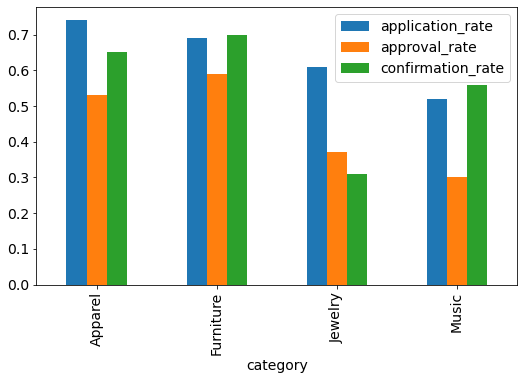

In [339]:
# Now lets build a visualization to summarize our analysis
funnelmerchantsperformance.plot(x="category", y=['application_rate','approval_rate','confirmation_rate'], kind="bar")

##### 3.2. Which user demographic to focus on?

#### Users demographic may include age and fico_score factor.
#### Lets start first with the age group

First, we want to find the revenue performance index

In [340]:
# Use the created loans merchants dataset (a merged between loansdata and merchants data
# Copy to new one to be used for this part
loansmerchants3 = loansmerchants.copy()
loansmerchants3.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group,merchant_name,category,revenue
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49,Age 45-64,Good,"Goat, LLC",Apparel,32.0
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40,Age 30-44,Fair,Cheddar Inc.,Apparel,125.0
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38,Age 30-44,Exceptional,Pepperjack Co.,Furniture,100.0
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40,Age 30-44,Fair,Pepperjack Co.,Furniture,128.0
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70,65 and older,Very Good,Pepperjack Co.,Furniture,138.0


In [341]:
# Group by age_group to see the revenue performance by age_group
loansmerchantsage = loansmerchants3.groupby(['age_group']).sum().reset_index()
loansmerchantsage.head()

,age_group,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,revenue
0,65 and older,2207930.90,38975.11,5946023,26743,94.455,595.8895,2031508,196.0944,213985,251193.0
1,Age 30-44,14630604.02,488210.34,38106377,164833,661.189,3540.4547,12468735,1131.1855,717033,1551002.0
2,Age 45-64,15134660.69,526081.97,37454457,169847,610.582,3859.7331,12389714,1162.8746,1005173,1588591.0
3,Younger than 30,1264469.53,42103.07,4782069,21189,65.720,529.2839,1482492,148.8960,66310,114663.0


In [342]:
# Drop irrelevant columns
# We have the total revenue by merchant category
columnsage = ['age_group','revenue']
loansagerevenue = loansmerchantsage[columnsage]
loansagerevenue.head()

,age_group,revenue
0,65 and older,251193.0
1,Age 30-44,1551002.0
2,Age 45-64,1588591.0
3,Younger than 30,114663.0


In [343]:
# So we can see that the total revenue from age_group in order of decreasing:
# 1. Age 45-64
# 2. Age 30-44
# 3. 65 and older
# 4. Younger than 30

In [344]:
# However, we may want to look at the total number of customer/user in each age group
# Group by age_group to see the total revenue performance by age group
loansagecount = loansmerchants.groupby(['age_group']).nunique()
loansagecount.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group,merchant_name,category,revenue
age_group,,,,,,,,,,,,,,,,,,,
65 and older,13,2155,3048,91,1823,192,377,37,5,14,24,313,1704,37,1,5,12,4,591
Age 30-44,16,14290,19210,91,6650,1579,568,15,5,17,24,369,3336,15,1,5,15,4,1413
Age 45-64,15,13346,19030,91,7241,1614,578,20,5,18,28,384,3238,20,1,5,14,4,1516
Younger than 30,13,1796,2399,91,1490,285,295,6,5,14,17,238,1505,6,1,4,12,4,434


In [346]:
# Drop irrelevant columns
# We have the total number of user by age group
columns = ['user_id']
loansagecount_user = loansagecount[columns]
loansagecount_user.rename(columns={"user_id": "number_of_customers"}, inplace=True)
loansagecount_user.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,number_of_customers
age_group,
65 and older,2155
Age 30-44,14290
Age 45-64,13346
Younger than 30,1796


In [347]:
# Dive deep into the analysis by computing the revenue per user/customer for each of four category
# Merge two data
loansage_revenuesummary = pd.merge(loansagerevenue, loansagecount_user,
                 on='age_group', 
                 how='left')
# Create revenue per user column
loansage_revenuesummary['revenue_per_customer'] = (round(loansage_revenuesummary['revenue'] / 
                                                    loansage_revenuesummary['number_of_customers']))
loansage_revenuesummary.head()

,age_group,revenue,number_of_customers,revenue_per_customer
0,65 and older,251193.0,2155,117.0
1,Age 30-44,1551002.0,14290,109.0
2,Age 45-64,1588591.0,13346,119.0
3,Younger than 30,114663.0,1796,64.0


([<matplotlib.axis.YTick at 0x1c019fa9460>,
 [Text(0, 0, '0.0'),
  Text(0, 0, '20.0'),
  Text(0, 0, '40.0'),
  Text(0, 0, '60.0'),
  Text(0, 0, '80.0'),
  Text(0, 0, '100.0'),
  Text(0, 0, '120.0'),
  Text(0, 0, '140.0')])

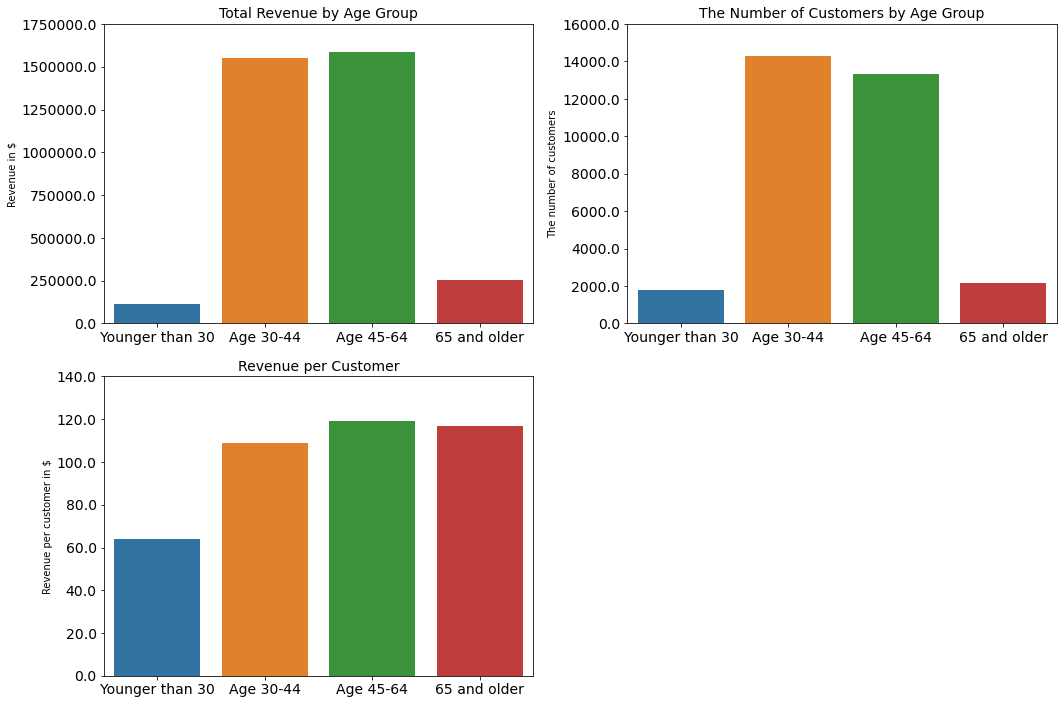

In [348]:
# Now lets build a visualization to summarize our analysis
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2)

v4 = fig.add_subplot(gs[0, 0])
v4 = sns.barplot(data = loansage_revenuesummary, x='age_group', y='revenue',
                 order=["Younger than 30", "Age 30-44", "Age 45-64", "65 and older"])
v4.set_title("Total Revenue by Age Group", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('Revenue in $', fontsize=10)
plt.yticks(v4.get_yticks(), v4.get_yticks())

v5 = fig.add_subplot(gs[0, 1])
v5 = sns.barplot(data = loansage_revenuesummary, x='age_group', y='number_of_customers',
                order=["Younger than 30", "Age 30-44", "Age 45-64", "65 and older"])
v5.set_title("The Number of Customers by Age Group", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('The number of customers', fontsize=10)
plt.yticks(v5.get_yticks(), v5.get_yticks())

v6 = fig.add_subplot(gs[1, 0])
v6 = sns.barplot(data = loansage_revenuesummary, x='age_group', y='revenue_per_customer',
                order=["Younger than 30", "Age 30-44", "Age 45-64", "65 and older"])
v6.set_title("Revenue per Customer", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('Revenue per customer in $', fontsize=10)
plt.yticks(v6.get_yticks(), v6.get_yticks())

In [ ]:
# So we saw that Age 30-64 is the biggest user segment 
# However with the potential high revenue per customer of customers below 30, the company should focus on developing this segment
# Especially when currently this segment accounts for a small proportion of total revenue and customer base

Second, we want to find the relationship between age groups and loan amount

No handles with labels found to put in legend.


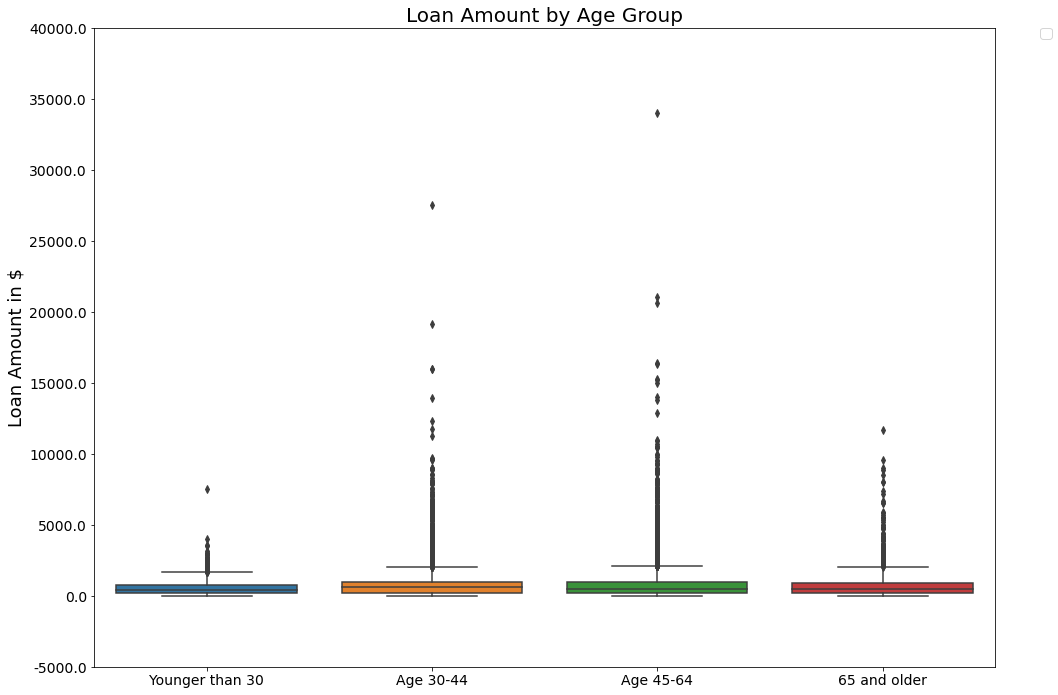

In [349]:
# 2D visualization
# Using boxplot to visualize the relationships between the age groups and loan amounts:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
v7 = sns.boxplot(data=loansdata, y="loan_amount", x="age_group",
                order=["Younger than 30", "Age 30-44", "Age 45-64", "65 and older"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
v7.set_title("Loan Amount by Age Group", fontsize = 20)
plt.xlabel('', fontsize=10)
plt.ylabel('Loan Amount in $', fontsize=18)
plt.yticks(v7.get_yticks(), v7.get_yticks())
plt.rcParams['font.size'] = '18'

Next, we also may want to find the relationship between age groups and loan_length_months

No handles with labels found to put in legend.


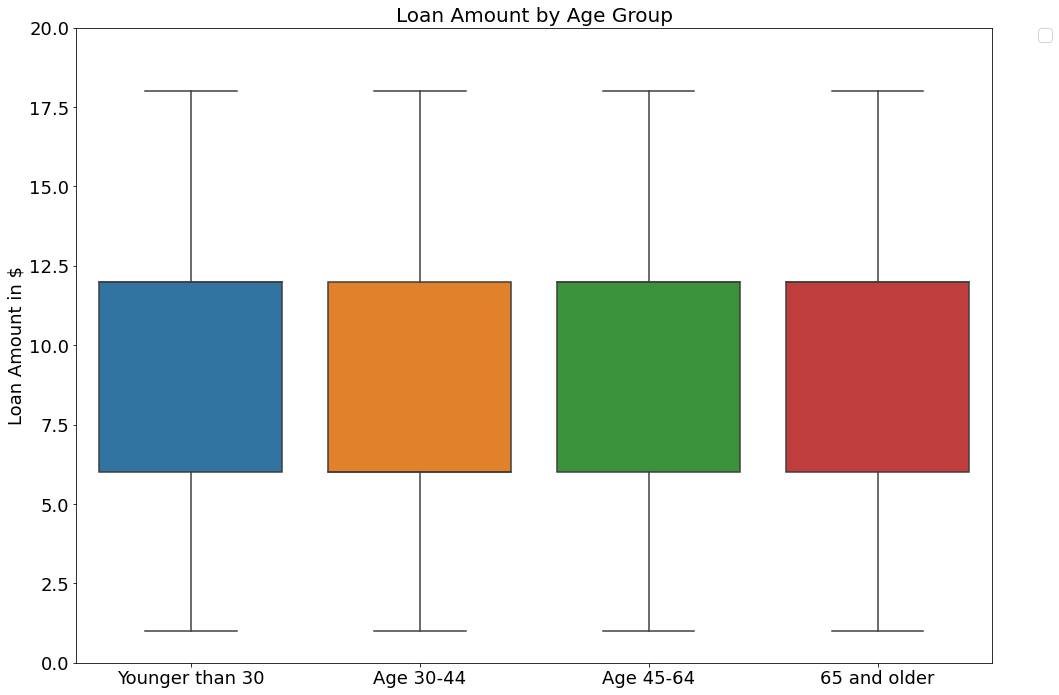

In [350]:
# 2D visualization
# Using boxplot to visualize the relationships between age groups and loan_length_months:
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
v8 = sns.boxplot(data=loansdata, y="loan_length_months", x="age_group",
                order=["Younger than 30", "Age 30-44", "Age 45-64", "65 and older"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
v8.set_title("Loan Amount by Age Group", fontsize = 20)
plt.xlabel('', fontsize=10)
plt.ylabel('Loan Amount in $', fontsize=18)
plt.yticks(v8.get_yticks(), v8.get_yticks())
plt.rcParams['font.size'] = '18'

#### Now we can dive deep into fico_score groups

First, we want to find the revenue performance index

In [351]:
# Use the created loans merchants dataset (a merged between loansdata and merchants data)
# Copy to new one to be used for this part
loansmerchants4 = loansmerchants.copy()
loansmerchants4.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group,merchant_name,category,revenue
0,ZXTF6RNQXU3VCMHV,6387-9021-JSOJ,3AOXIJUSJKQOE0UB,2/6/16 0:00,1060.0,0.0,10/13/15,1972,12,0.025,0.25,685,0.0055,49,Age 45-64,Good,"Goat, LLC",Apparel,32.0
1,YKHCNPR33GOHG3M6,3200-9015-GCZG,YWMTY1ZYAXB4G0LV,2/1/16 0:00,2300.0,0.0,0,1981,12,0.019,0.30,628,0.0353,40,Age 30-44,Fair,Cheddar Inc.,Apparel,125.0
2,MNLK8D11U6PV4THN,2656-3540-OPOR,6ANRFMR2W3YTVBP6,3/31/16 0:00,850.0,0.0,0,1983,6,0.059,0.00,808,0.0584,38,Age 30-44,Exceptional,Pepperjack Co.,Furniture,100.0
3,MNLK8D11U6PV4THN,0175-9602-ERQN,P5C004D6YERT9S8G,3/28/16 0:00,950.0,0.0,0,1981,6,0.059,0.00,612,0.0759,40,Age 30-44,Fair,Pepperjack Co.,Furniture,128.0
4,MNLK8D11U6PV4THN,6053-1602-FBDR,XEIT9H4G4BNF8MNB,1/5/16 0:00,859.0,0.0,0,1951,6,0.059,0.00,783,0.1019,70,65 and older,Very Good,Pepperjack Co.,Furniture,138.0


In [352]:
# Group by fico_group to see the revenue performance by fico group
loansmerchantsfico = loansmerchants4.groupby(['fico_group']).sum().reset_index()
loansmerchantsfico.head()

,fico_group,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,revenue
0,Exceptional,1666181.19,12164.48,2287102,9908,62.334,48.5522,951946,80.5896,61300,217753.0
1,Fair,15611860.46,685275.14,49336533,222610,735.645,5688.5156,15681128,1487.6557,1152089,1540803.0
2,Good,10423239.74,170857.18,21491929,94407,384.646,1732.1254,7595896,661.4825,488467,1138534.0
3,Poor,1011428.53,145535.37,5977658,25858,80.644,773.5438,1356739,191.1369,133846,101148.0
4,Very Good,4524955.22,81538.32,7195704,29829,168.677,282.6242,2786740,218.1858,166799,507211.0


In [353]:
# Drop irrelevant columns
# We have the total revenue by different fico group
columnsfico = ['fico_group','revenue']
loansficorevenue = loansmerchantsfico[columnsfico]
loansficorevenue.head()

,fico_group,revenue
0,Exceptional,217753.0
1,Fair,1540803.0
2,Good,1138534.0
3,Poor,101148.0
4,Very Good,507211.0


In [354]:
# However, we may want to look at the total number of customer/user in each fico group
# Group by fico score to see the total revenue performance by fico group
loansficocount = loansmerchants.groupby(['fico_group']).nunique()
loansficocount.head()

,merchant_id,user_id,checkout_id,checkout_date,loan_amount,down_payment_amount,users_first_capture,user_dob_year,loan_length_months,mdr,apr,fico_score,loan_return_percentage,age,age_group,fico_group,merchant_name,category,revenue
fico_group,,,,,,,,,,,,,,,,,,,
Exceptional,13,1047,1162,91,710,16,110,56,5,12,8,51,918,56,3,1,12,4,548
Fair,15,17108,24982,91,8364,2344,578,72,5,17,18,90,3664,72,4,1,14,4,1358
Good,14,8334,10876,91,4618,340,532,68,5,17,17,70,2718,68,4,1,13,4,1302
Poor,11,2073,3024,91,1709,755,436,55,5,14,14,118,1721,55,4,1,11,4,393
Very Good,14,3145,3643,91,1845,76,315,61,5,14,16,60,1898,61,4,1,13,4,882


In [355]:
# Drop irrelevant columns
# We have the total number of user by fico group
columns = ['user_id']
loansficocount_user = loansficocount[columns]
loansficocount_user.rename(columns={"user_id": "number_of_customers"}, inplace=True)
loansficocount_user.head()

C:\Anaconda\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,number_of_customers
fico_group,
Exceptional,1047
Fair,17108
Good,8334
Poor,2073
Very Good,3145


In [356]:
# Dive deep into the analysis by computing the revenue per user/customer for each of fico
# Merge two data
loansfico_revenuesummary = pd.merge(loansficorevenue, loansficocount_user,
                 on='fico_group', 
                 how='left')
# Create revenue per user column
loansfico_revenuesummary['revenue_per_customer'] = (round(loansfico_revenuesummary['revenue'] / 
                                                    loansfico_revenuesummary['number_of_customers']))
loansfico_revenuesummary.head()

,fico_group,revenue,number_of_customers,revenue_per_customer
0,Exceptional,217753.0,1047,208.0
1,Fair,1540803.0,17108,90.0
2,Good,1138534.0,8334,137.0
3,Poor,101148.0,2073,49.0
4,Very Good,507211.0,3145,161.0


([<matplotlib.axis.YTick at 0x1c01bdeb550>,
 [Text(0, 0, '0.0'),
  Text(0, 0, '50.0'),
  Text(0, 0, '100.0'),
  Text(0, 0, '150.0'),
  Text(0, 0, '200.0'),
  Text(0, 0, '250.0')])

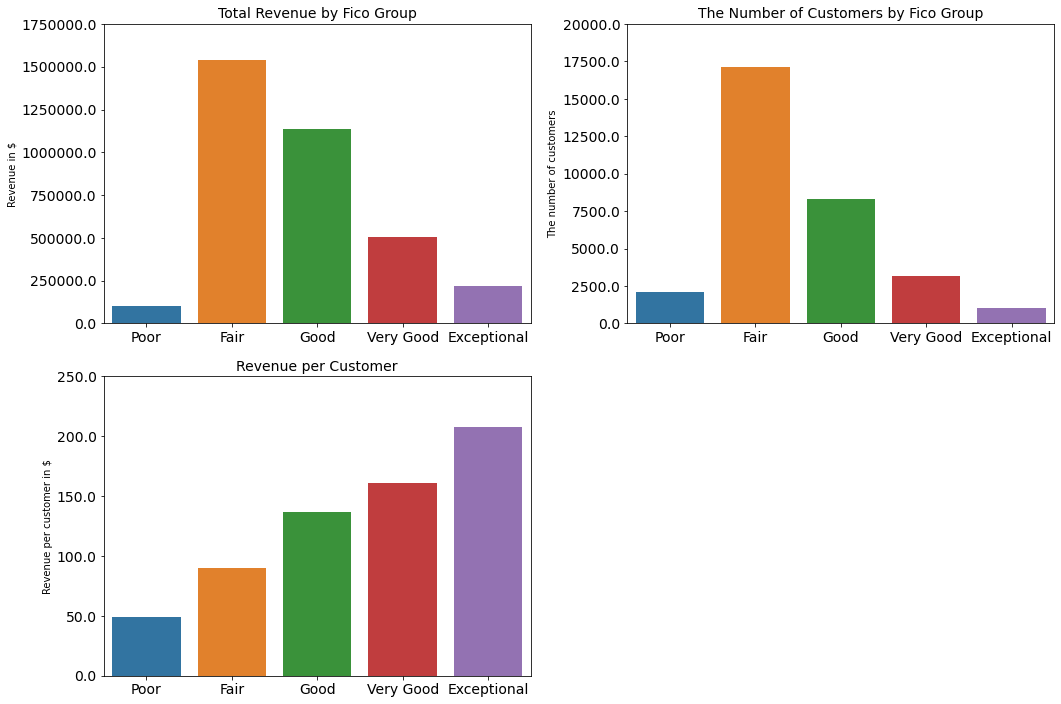

In [357]:
# Now lets build a visualization to summarize our analysis
import matplotlib.pyplot as plt
from matplotlib import gridspec

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(nrows=2, ncols=2)
plt.rcParams['font.size'] = '14'

v9 = fig.add_subplot(gs[0, 0])
v9 = sns.barplot(data = loansfico_revenuesummary, x='fico_group', y='revenue',
                 order=["Poor", "Fair", "Good", "Very Good", "Exceptional"])
v9.set_title("Total Revenue by Fico Group", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('Revenue in $', fontsize=10)
plt.yticks(v9.get_yticks(), v9.get_yticks())

v10 = fig.add_subplot(gs[0, 1])
v10 = sns.barplot(data = loansfico_revenuesummary, x='fico_group', y='number_of_customers',
                order=["Poor", "Fair", "Good", "Very Good", "Exceptional"])
v10.set_title("The Number of Customers by Fico Group", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('The number of customers', fontsize=10)
plt.yticks(v10.get_yticks(), v10.get_yticks())

v11 = fig.add_subplot(gs[1, 0])
v11 = sns.barplot(data = loansfico_revenuesummary, x='fico_group', y='revenue_per_customer',
                order=["Poor", "Fair", "Good", "Very Good", "Exceptional"])
v11.set_title("Revenue per Customer", fontsize = 14)
plt.xlabel('', fontsize=10)
plt.ylabel('Revenue per customer in $', fontsize=10)
plt.yticks(v11.get_yticks(), v11.get_yticks())

Second, we want to see the relationship between fico score and funnel conversion rate

In [358]:
# Group by fico to see the funnel performance by fico
funnelloansperformance = funnelloans.groupby(['fico_score']).mean().reset_index()
funnelloansperformance.head()

,fico_score,num_loaded,num_applied,num_approved,num_confirmed,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,loan_return_percentage,age
0,0.0,5.516423,5.539162,3.793419,2.126374,425.972095,30.433515,1982.763206,8.48816,0.033876,0.227187,0.065683,38.236794
1,450.0,3.000000,3.000000,1.500000,1.000000,159.750000,18.300000,1974.000000,9.00000,0.019000,0.300000,0.175600,47.000000
2,454.0,3.000000,3.000000,3.000000,3.000000,113.763333,0.000000,1972.000000,12.00000,0.019000,0.300000,-0.010400,49.000000
3,459.0,1.000000,1.000000,1.000000,1.000000,244.000000,48.800000,1971.000000,6.00000,0.019000,0.300000,0.112700,50.000000
4,464.0,2.000000,2.000000,2.000000,1.000000,232.230000,0.000000,1984.000000,3.00000,0.019000,0.300000,0.032200,37.000000


In [359]:
# Add three calculation columns to the funnelloansperformance
# We end up with the current funnel performance by fico_score
funnelloansperformance['application_rate'] = round(funnelloansperformance['num_applied'] / funnelloansperformance['num_loaded'], 2)
funnelloansperformance['approval_rate'] = round(funnelloansperformance['num_approved'] / funnelloansperformance['num_applied'], 2)
funnelloansperformance['confirmation_rate'] = round(funnelloansperformance['num_confirmed'] / funnelloansperformance['num_approved'], 2)
funnelloansperformance.head()

,fico_score,num_loaded,num_applied,num_approved,num_confirmed,loan_amount,down_payment_amount,user_dob_year,loan_length_months,mdr,apr,loan_return_percentage,age,application_rate,approval_rate,confirmation_rate
0,0.0,5.516423,5.539162,3.793419,2.126374,425.972095,30.433515,1982.763206,8.48816,0.033876,0.227187,0.065683,38.236794,1.0,0.68,0.56
1,450.0,3.000000,3.000000,1.500000,1.000000,159.750000,18.300000,1974.000000,9.00000,0.019000,0.300000,0.175600,47.000000,1.0,0.50,0.67
2,454.0,3.000000,3.000000,3.000000,3.000000,113.763333,0.000000,1972.000000,12.00000,0.019000,0.300000,-0.010400,49.000000,1.0,1.00,1.00
3,459.0,1.000000,1.000000,1.000000,1.000000,244.000000,48.800000,1971.000000,6.00000,0.019000,0.300000,0.112700,50.000000,1.0,1.00,1.00
4,464.0,2.000000,2.000000,2.000000,1.000000,232.230000,0.000000,1984.000000,3.00000,0.019000,0.300000,0.032200,37.000000,1.0,1.00,0.50


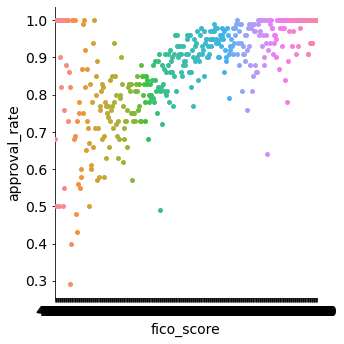

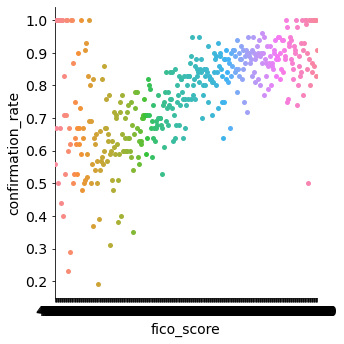

In [360]:
# 2D visualization
import seaborn as sns
import matplotlib.pyplot as plt

v12 = sns.catplot(data=funnelloansperformance, y="approval_rate", x="fico_score")
v13 = sns.catplot(data=funnelloansperformance, y="confirmation_rate", x="fico_score")

In [241]:
# This is also the end of the current analysis